In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from erbium_interface.utils import utils
from erbium_interface.utils.trajectory import Trajectory, Trajectories

%load_ext autoreload
%autoreload 1
%aimport erbium_interface.utils.trajectory
%aimport erbium_interface.utils.distance
%aimport erbium_interface.utils.utils

# Trajectory Conversion

1. The Desmond trajectories are converted into "pdb/dcd" format.
2. Only relevant molecules are selected/kept through the conversion.
3. This process has yet to be added to the packaged.

In [13]:
data_dir = "/data2/zliang47/md_Er_1DEHP_water_repeat_4A/analysis/"
dcd_dir = os.path.join(data_dir, './dcd_trajectories')

# Trajectory Analysis

1. There are two main types of Classes: `Trajectory/Trajectories` and `Distance/Distances`
2. `Trajectories` is the container of `Trajectory` objects. It handles the batchprocesing workflow like trajectory conversion, etc.
3. A `Trajectory` is one single simulation on which a lot of analysis can be performed, one of which is to extract `Distances` object.
4. A `Distancse` object is a container of atom **pairs** whose distances in between can be easily extracted and analyzed, e.g. a list of Er-SPC pairs for all the first shell waters.
5. A `Distance` object describes the distance between **one** pair of atoms whose distance can be easily extracted and anlyzed, e.g. Er-SPC for on of the first shell waters, or Er-P.

### Load trajectory

In [3]:
b = Trajectory(
    top_path = os.path.join(dcd_dir, "md_20220308_161_16.pdb"),
    trj_path = os.path.join(dcd_dir, "md_20220308_161_16.dcd")
)

In [4]:
b.molecule is None

True

### Load molecule

In [5]:
b.load_molecule(method="md_traj")

In [6]:
b.molecule

<mdtraj.Trajectory with 4002 frames, 904 atoms, 285 residues, and unitcells at 0x7fca8a29dee0>

In [7]:
b.frames

array([   0,    1,    2, ..., 3999, 4000, 4001])

### Get a `Distance` object from a `Trajectory` object

`ErSPCDistance` is a child class of `Distance` that has properties exclusive for water molecules, e.g. whether it is a 1st shell water, ejection frame, etc.

In [8]:
c = b.get_ErSPCdistance("type==Er", "type==O and resname==SPC")
c

In [9]:
print(c.to_numpy().shape)
c.to_numpy()

(282, 4002)


array([[ 8.958288 ,  8.910513 ,  8.926579 , ..., 30.54153  , 30.48379  ,
        30.429935 ],
       [18.216879 , 18.073708 , 18.02943  , ..., 20.08912  , 20.448547 ,
        20.49846  ],
       [14.606008 , 14.58664  , 14.349923 , ...,  2.4928446,  2.4131289,
         2.4530149],
       ...,
       [21.725931 , 21.771193 , 21.889576 , ..., 10.491484 , 10.216992 ,
        10.191908 ],
       [ 4.5538154,  4.3700094,  4.5203032, ...,  2.354032 ,  2.4992385,
         2.4229243],
       [16.127947 , 16.035744 , 16.07855  , ...,  2.5513582,  2.8287802,
         2.8436377]], dtype=float32)

In [18]:
d = distances_spc.get_1st_shell(frame=145, threshold=3)
d.pairs

[(55, 187),
 (55, 367),
 (55, 487),
 (55, 562),
 (55, 574),
 (55, 649),
 (55, 721),
 (55, 733)]

# Water ejection direction

In [10]:
df = pd.read_csv(os.path.join(data_dir, "distance_Er_P.csv"))
df.head(2)

,p_seed,v_seed,trajectory,FR0000,FR0001,FR0002,FR0003,FR0004,FR0005,FR0006,...,FR3992,FR3993,FR3994,FR3995,FR3996,FR3997,FR3998,FR3999,FR4000,FR4001
0,381,19,md_20220308_381_19,5.31202,5.482593,5.608334,5.526449,5.489309,5.546785,5.638951,...,5.326733,5.280065,5.388801,5.225072,5.246161,5.348094,5.156305,5.250669,5.254282,5.235717
1,211,20,md_20220308_211_20,5.31132,5.359220,5.562605,5.535626,5.388942,5.410673,5.390274,...,5.459646,5.360222,5.458223,5.646379,5.778454,5.682869,5.636158,5.561903,5.593558,5.575364


In [102]:
select_binding = (df.iloc[:,-10:].to_numpy().mean(axis=1)<4) & (df.iloc[:,3:13].to_numpy().mean(axis=1)>4)
df_binding = df.loc[select_binding]
df_binding.head(5)

,p_seed,v_seed,trajectory,FR0000,FR0001,FR0002,FR0003,FR0004,FR0005,FR0006,...,FR3992,FR3993,FR3994,FR3995,FR3996,FR3997,FR3998,FR3999,FR4000,FR4001
17,591,8,md_20220308_591_8,4.970609,4.927366,4.892286,5.066573,5.340043,5.421132,5.285758,...,3.624701,3.661457,3.672731,3.690733,3.646927,3.665589,3.651318,3.627408,3.706956,3.725929
19,831,82,md_20220308_831_82,5.324335,5.339164,5.433690,5.363171,5.457819,5.530863,5.438564,...,3.677440,3.689403,3.587707,3.615756,3.648915,3.627736,3.663942,3.659281,3.655259,3.710974
24,901,54,md_20220308_901_54,5.124284,5.199633,5.333055,5.261633,5.272411,5.333920,5.428429,...,3.647301,3.629052,3.592632,3.699324,3.637447,3.635122,3.678417,3.605061,3.653944,3.710456
40,751,80,md_20220308_751_80,5.341733,5.280960,5.473416,5.720585,5.640568,5.703086,5.667315,...,3.640140,3.647234,3.730024,3.639517,3.618416,3.723705,3.640044,3.632545,3.615021,3.598904
43,751,1,md_20220308_751_1,5.486809,5.443926,5.441446,5.423119,5.515296,5.526833,5.475513,...,3.643530,3.619508,3.676916,3.611111,3.628466,3.682191,3.662708,3.593402,3.646285,3.615438


In [145]:
o_threshold = 3.0
p_threshold = 4.3
delta_frame = -10
name = "md_20220308_901_54"

# Read molecule and calculate distances
a = Trajectory(os.path.join(dcd_dir, name+".pdb"), os.path.join(dcd_dir, name+".dcd"), name=name)
a.load_molecule(method='md_traj')

# determine the frame where P-Er crosses `p_threshold`.
distances_p = a.get_ErPdistance("type==Er", "index==0")
threshold_frame = distances_p[0].get_frame_upon_binding(p_threshold)
print("Binding frame: ", threshold_frame)
# Find first shell waters 
distances_spc = a.get_ErSPCdistance("type==Er", "type==O and resname==SPC")
cn = distances_spc.get_cn()
# get the first coordination shell at "T+delta" frame.
ref_frame = threshold_frame+delta_frame
distances_1st_shell = distances_spc.get_1st_shell(frame=threshold_frame+delta_frame)
for spc in distances_1st_shell:
    print(spc.get_frame_upon_eject(start=ref_frame, end=ref_frame+100, stay=1))

Binding frame:  1496
(1514, 1)
(None, None)
(None, None)
(None, None)
(None, None)
(None, None)
(1490, 95)
(None, None)
(None, None)


In [142]:
x = distances_1st_shell[0]
from statsmodels.nonparametric.smoothers_lowess import lowess
d_spc_smooth = []
for i, d in enumerate(distances_1st_shell):
    d_spc_smooth.append(lowess(d._data, d.frames, frac=0.0005))
    print(f"{i+1}", end='\r', flush=True)
d_spc_smooth = np.stack(d_spc_smooth)
d_p_smooth = [lowess(d._data, d.frames, frac=0.005) for d in distances_p]

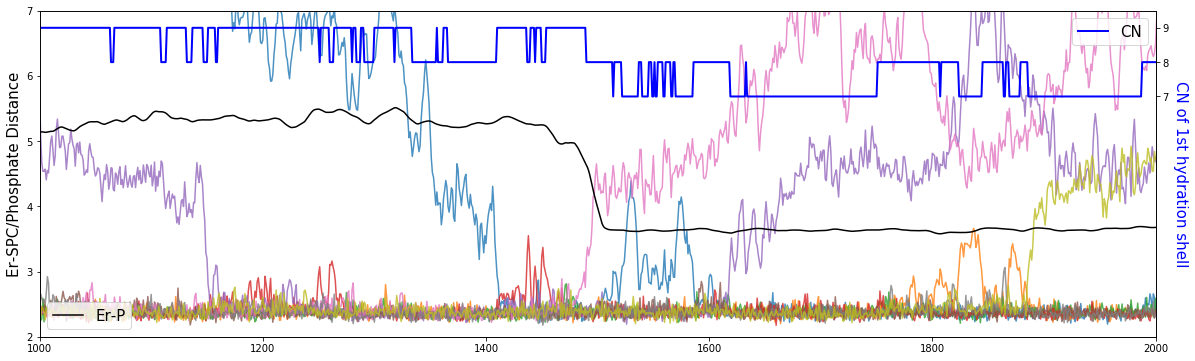

In [143]:
fig, ax = plt.subplots(figsize=(20,6))
for i, d in enumerate(d_spc_smooth):
    ax.plot(d[:,0], d[:,1], alpha=0.8)
for i, d in enumerate(d_p_smooth):
    ax.plot(d[:,0], d[:,1], color='k', label='Er-P')
ax.set_ylim([2,7])
ax.set_xlim([1000,2000])
ax.set_ylabel("Er-SPC/Phosphate Distance", fontsize=15)
ax.legend(fontsize=15, loc='lower left')
ax.axvline(43)

ax1 = ax.twinx()
ax1.plot(x.frames, cn, color='b', lw=2, label='CN')
ax1.set_ylabel("CN of 1st hydration shell", fontsize=15, color='blue', rotation=270,va='bottom')
ax1.set_ylim([0,9.5])
ax1.set_yticks([7,8,9])
ax1.set_yticklabels([7,8,9])
ax1.legend(fontsize=15)
plt.show()

[[1490, 95]]


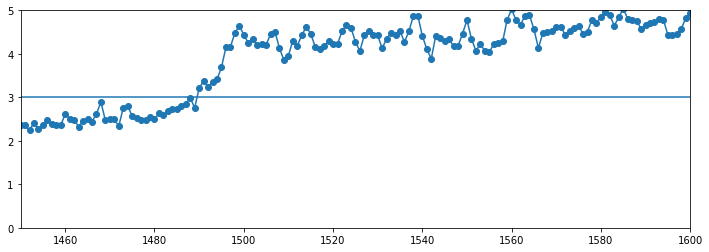

In [151]:
x = distances_1st_shell[-3]
x.get_frame_upon_eject(start=ref_frame, end=ref_frame+100, stay=2)
print(x._ejection_frames)
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(x.frames, x.to_numpy(), marker='o')
ax.set_xlim([1450,1600])
ax.set_ylim([0,5])
ax.axhline(3)
ax.axvline(43)

In [82]:
o_threshold = 3.0
delta_frame_list = [-50, -40, -25, -10, 0]
p_threshold_list = [4.3]

delta_threshold_list = [(delta, thres) for delta in delta_frame_list for thres in p_threshold_list]


for delta_thres in delta_threshold_list:
    
    delta_frame, p_threshold = delta_thres
    
    cn_list_aligned_to_zero_frame = []
    h_value_aligned_to_zero_frame = []

    for name in df_binding['trajectory'].to_list():
    
        # Read molecule and calculate distances
        a = Trajectory(os.path.join(dcd_dir, name+".pdb"), os.path.join(dcd_dir, name+".dcd"), name=name)
        a.load_molecule(method='md_traj')

        # determine the frame where P-Er crosses `p_threshold`.
        distances_p = a.get_ErPdistance("type==Er", "index==0")
        threshold_frame = distances_p[0].get_frame_upon_binding(p_threshold)
        if threshold_frame == -1: continue # no binding was found
        
        # Find first shell waters 
        # append the average cn
        distances_spc = a.get_ErSPCdistance("type==Er", "type==O and resname==SPC")
        # get the first coordination shell at "T+delta" frame.
        ref_frame = threshold_frame+delta_frame
        distances_1st_shell = distances_spc.get_1st_shell(frame=threshold_frame+delta_frame)
        for spc in distances_1st_shell:
            print(spc.get_frame_upon_eject(start=ref_frame, end=ref_frame+100, stay=1))
        break
    break

(None, None)
(126, 4)
(None, None)
(None, None)
(None, None)
(None, None)
(206, 3)
(None, None)
(None, None)


In [65]:

x.get_frame_upon_eject(start=ref_frame, stay=2)

(664, 16)

In [66]:
x._ejection_frames

[[664, 16],
 [685, 1],
 [1818, 11],
 [1944, 6],
 [1978, 8],
 [2018, 14],
 [2035, 4],
 [2045, 37],
 [2087, 9],
 [2155, 6],
 [2163, 1],
 [2174, 24],
 [2200, 10],
 [2229, 2],
 [2241, 14],
 [2264, 20],
 [2292, 4],
 [2299, 3],
 [2318, 1],
 [2336, 46],
 [2426, 1],
 [2432, 5],
 [2505, 5],
 [2559, 2],
 [2637, 1],
 [2658, 1],
 [2669, 1],
 [2776, 4],
 [2781, 1],
 [2783, 6],
 [2796, 2],
 [2802, 8],
 [2811, 1190]]

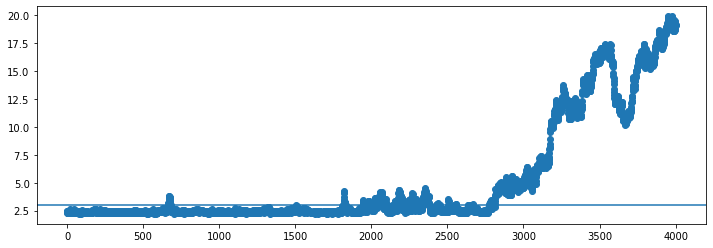

In [70]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(x.frames, x.to_numpy(), marker='o')
# ax.set_xlim([600, 700])
# ax.set_ylim([0,5])
ax.axhline(3)

In [16]:
distances_1st_shell.pairs

[(55, 187),
 (55, 367),
 (55, 487),
 (55, 562),
 (55, 574),
 (55, 649),
 (55, 721),
 (55, 733)]

In [50]:
a = np.array(
    [[1,2,3],
    [4,5,6]]
)

In [52]:
b = np.stack(
    [aa[1:2] for aa in a]
)

In [83]:
zero_frame

161

In [86]:
a = distances_spc.get_1st_shell(frame=161)

In [88]:
a.pairs

[(55, 187),
 (55, 367),
 (55, 487),
 (55, 562),
 (55, 574),
 (55, 649),
 (55, 721),
 (55, 733)]